In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('boston.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [4]:
df = df[['MEDV','AGE','LSTAT']]

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model 
X=df[['AGE','LSTAT']].values
y=df['MEDV'].values
X=X.astype(float)
y=y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=16)

In [6]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

33.096534728461165
[ 0.05756119 -1.15708781]


In [7]:
import numpy as np
from sklearn import metrics
y_test_pred=model.predict(X_test)
print('Score or R-squared: ',model.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred)) 

Score or R-squared:  0.4069676937197577
Mean Absolute Error: 4.591874571502651
Mean Squared Error: 39.24693104001137
Root Mean Squared Error: 6.264737108611292
Mean Absolute percentage Error: 0.25478031693370246


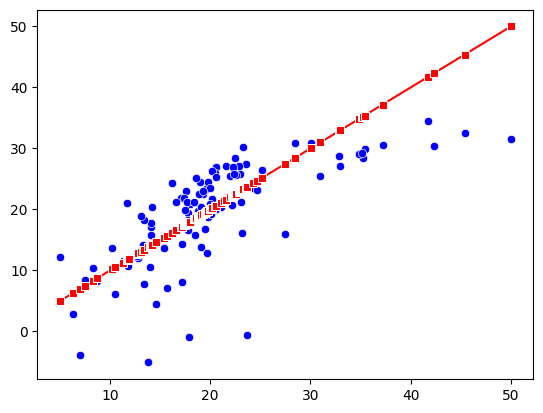

In [8]:
import seaborn  as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),marker='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),marker='o',color='b')
plt.show()

In [10]:
y_test_pred=model.predict(X_test)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['AGE_test','LSTAT_test','y_test','y_test_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']
dfTestValidation

,AGE_test,LSTAT_test,y_test,y_test_predicted,Residual
0,100.0,7.39,23.3,30.301775,-7.001775
1,93.9,22.88,12.8,12.027361,0.772639
2,77.8,29.97,6.3,2.896873,3.403127
3,51.8,6.58,35.2,28.464566,6.735434
4,98.4,14.59,17.1,21.878644,-4.778644
...,...,...,...,...,...
97,88.4,14.65,17.7,21.233607,-3.533607
98,25.8,9.97,19.3,23.045448,-3.745448
99,94.9,21.45,15.4,13.739558,1.660442
100,95.4,15.03,18.4,21.196842,-2.796842


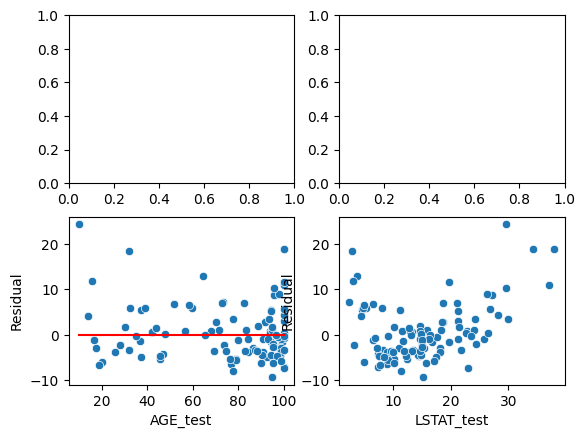

In [11]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='AGE_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='LSTAT_test',y='Residual',ax=axes[1,1])
plt.show()

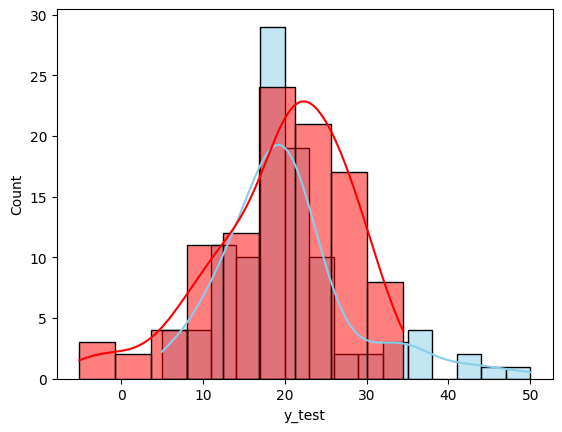

In [12]:
sns.histplot(data=dfTestValidation,x='y_test',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_test_predicted',color="red",label="Forecast",kde=True)
plt.show()

In [13]:
import numpy as np
from sklearn import metrics
y_train_pred=model.predict(X_train)
print('Score or R-squared: ',model.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_train, y_train_pred)) 

Score or R-squared:  0.5630979953818331
Mean Absolute Error: 4.566213908719438
Mean Squared Error: 38.20805667876179
Root Mean Squared Error: 6.181266591788595
Mean Absolute percentage Error: 0.21828894529148998


In [21]:
y_train_pred=model.predict(X_train)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['AGE_train','LSTAT_train','y_train','y_train_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_train'] - dfTestValidation['y_train_predicted']
dfTestValidation

,AGE_train,LSTAT_train,y_train,y_train_predicted,Residual
0,100.0,7.39,23.3,30.301775,-7.001775
1,93.9,22.88,12.8,12.027361,0.772639
2,77.8,29.97,6.3,2.896873,3.403127
3,51.8,6.58,35.2,28.464566,6.735434
4,98.4,14.59,17.1,21.878644,-4.778644
...,...,...,...,...,...
97,88.4,14.65,17.7,21.233607,-3.533607
98,25.8,9.97,19.3,23.045448,-3.745448
99,94.9,21.45,15.4,13.739558,1.660442
100,95.4,15.03,18.4,21.196842,-2.796842


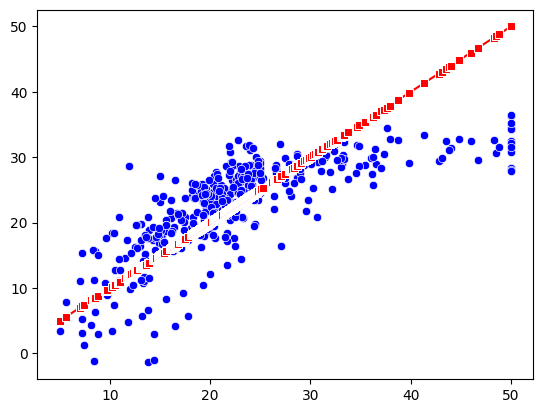

In [15]:
import seaborn  as sns
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),marker='s',color='r')
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),marker='o',color='b')
plt.show()

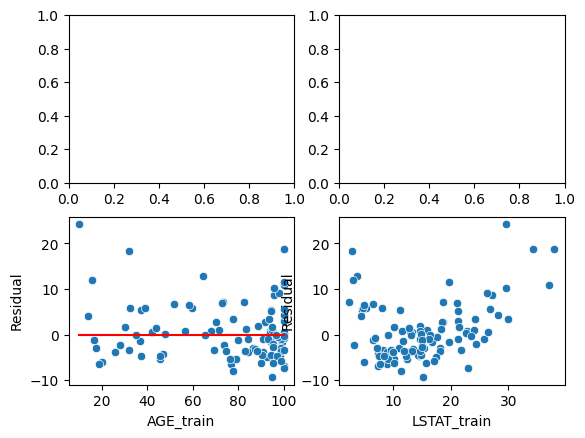

In [19]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='AGE_train',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_train',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='LSTAT_train',y='Residual',ax=axes[1,1])
plt.show()

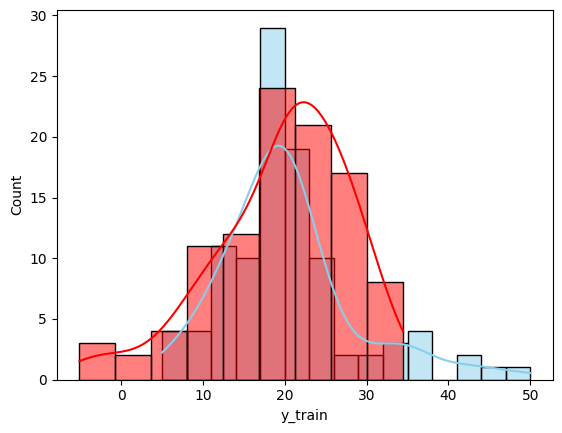

In [20]:
sns.histplot(data=dfTestValidation,x='y_train',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_train_predicted',color="red",label="Forecast",kde=True)
plt.show()